In [81]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [82]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"

In [83]:
sys.path.append(os.path.join(ROOT_DIR, "Python"))   

In [84]:
from OsmnxElev import *

In [85]:
listNeigh=["Quartier 4-6","Quartier 4-2","Quartier 4-3","Notre-Dame-des-Laurentides","Quartier 4-5","Jésuites"]
listGraphs, listNodes=getSubgraphListNeighQc(listNeigh)

File exists => reading graph


In [86]:
listGraphs

{'Quartier 4-6': <networkx.classes.multidigraph.MultiDiGraph at 0x7ff6c410e5c0>,
 'Quartier 4-2': <networkx.classes.multidigraph.MultiDiGraph at 0x7ff6e1161e48>,
 'Quartier 4-3': <networkx.classes.multidigraph.MultiDiGraph at 0x7ff6c22a9dd8>,
 'Notre-Dame-des-Laurentides': <networkx.classes.multidigraph.MultiDiGraph at 0x7ff6bd6a3400>,
 'Quartier 4-5': <networkx.classes.multidigraph.MultiDiGraph at 0x7ff6c3ef5908>,
 'Jésuites': <networkx.classes.multidigraph.MultiDiGraph at 0x7ff6c3a4e9e8>}

In [87]:
graphQc = loadGraphElevGradesNeighQc()
graphQcSubset, listNodes = getSubgraphListNeighOneGraph(graphQc, listNeigh)

File exists => reading graph


In [88]:
#Examine individual neigh

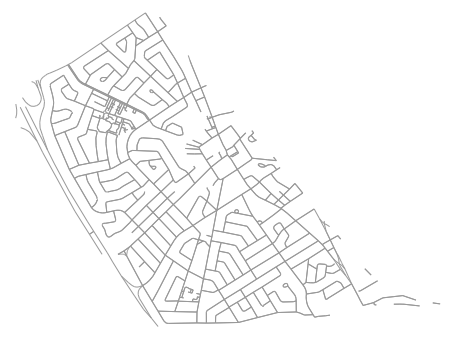

In [89]:
fig,ax =ox.plot_graph(listGraphs['Quartier 4-5'],show=False,close=False, node_size=0)

Computing edge bearings


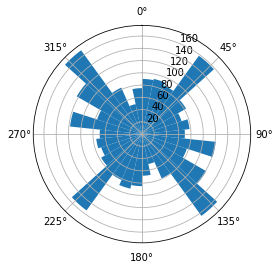

In [90]:
bar, ax=plotEdgeBearing(listGraphs['Quartier 4-5'])
fig=ax.get_figure()

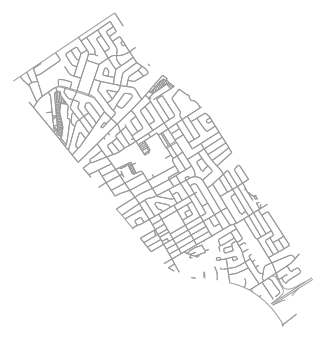

In [91]:
fig,ax =ox.plot_graph(listGraphs['Jésuites'],show=False,close=False, node_size=0)


Computing edge bearings


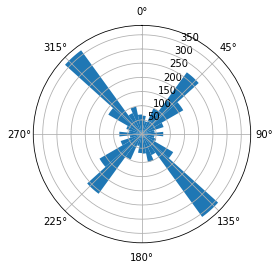

In [92]:
bar, ax=plotEdgeBearing(listGraphs['Jésuites'])
fig=ax.get_figure()

File exists => reading graph
There are  0.2891928087334118  of points in the bounding box in neighbourhoods Quartier 4-6, Quartier 4-2, Quartier 4-3, Notre-Dame-des-Laurentides, Quartier 4-5, Jésuites
In plotNeighGraphQc => simplifying graph


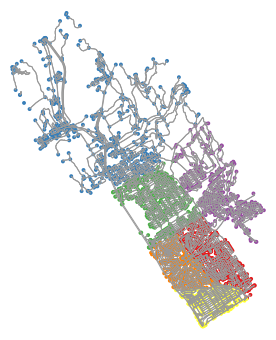

(<Figure size 507.264x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6b458a3c8>)

In [93]:
plotNeighGraphQc(listNeigh)

# Get all quebec neighbourhoods

In [94]:
shpQcCity = gpd.read_file(os.path.join(ROOT_DIR, "Data","GeoData","Neighbourhoods","vdq-quartier.shp"))
shpQcCity.head()

ID                                           NOM   SUPERFICIE  PERIMETRE  \
0   1                           Saint-Jean-Baptiste    678906.19    3781.17   
1   2                                     Cap-Rouge  12719875.43   19209.44   
2   3                            Cité Universitaire   7965511.15   12307.99   
3   4  Vieux-Québec/Cap-Blanc/Colline parlementaire   4293772.29   13796.73   
4   5                                   Des Châtels   9361555.58   16866.97   

                                            geometry  
0  POLYGON Z ((-71.21631942283598 46.812638240404...  
1  POLYGON Z ((-71.3937234763554 46.7584717847306...  
2  POLYGON Z ((-71.26750940561126 46.794866190810...  
3  POLYGON Z ((-71.20001449142366 46.813926919298...  
4  POLYGON Z ((-71.40300481113596 46.856427042165...

# Subset Charlesboug


In [95]:
shpCharlesbourg=shpQcCity.loc[ np.isin(shpQcCity.NOM, listNeigh )  ]
shpCharlesbourg

ID                         NOM   SUPERFICIE  PERIMETRE  \
14  15  Notre-Dame-des-Laurentides  36275613.50   29174.76   
18  19                Quartier 4-2   7603401.19   11718.26   
19  20                Quartier 4-3  11500089.73   15654.61   
20  21                    Jésuites   4894022.73   10475.71   
21  22                Quartier 4-5   3692402.70    8847.23   
22  23                Quartier 4-6   2902113.58    7570.88   

                                             geometry  
14  POLYGON Z ((-71.32695460431965 46.946128753662...  
18  POLYGON Z ((-71.27867424810438 46.898886661890...  
19  POLYGON Z ((-71.26113062466257 46.915230308757...  
20  POLYGON Z ((-71.24235961687519 46.849458419569...  
21  POLYGON Z ((-71.27693115096615 46.870091526333...  
22  POLYGON Z ((-71.25079899715962 46.850523887661...

## Plot together

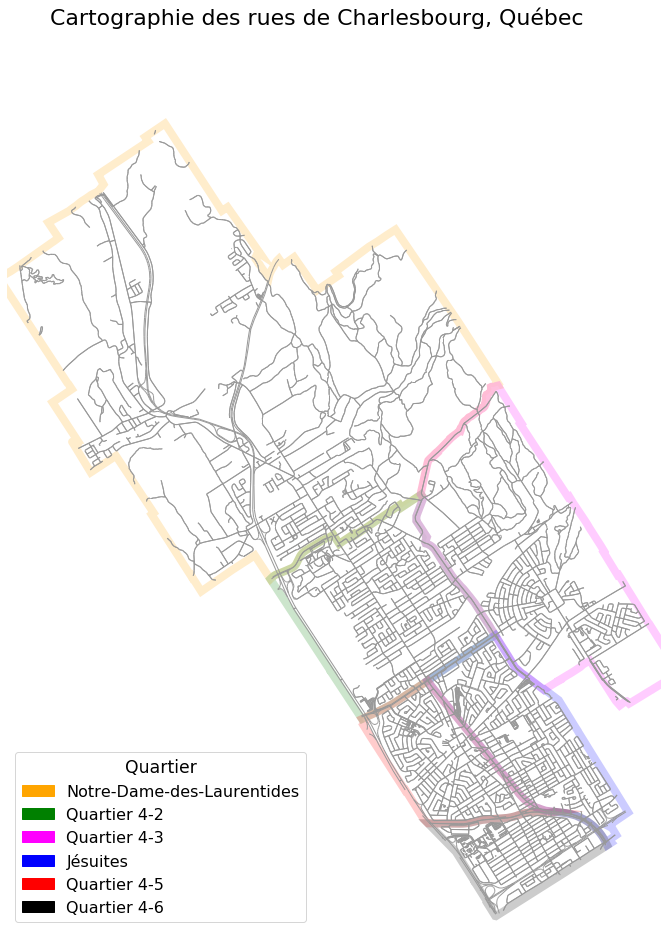

In [116]:
fig,ax =ox.plot_graph(graphQcSubset,show=False,close=False, node_size=0,fig_height=15, fig_width=20)
#shpCharlesbourg.plot(ax=ax,alpha=0.1,column="NOM")

dictCol=defaultdict(str)
dictCol["Quartier 4-6"] = "black"
dictCol["Quartier 4-2"] = "green"
dictCol["Quartier 4-3"] = "magenta"
dictCol["Notre-Dame-des-Laurentides"] = "orange"
dictCol["Quartier 4-5"] = "red"
dictCol["Jésuites"] = "blue"

neighColName = "NOM"

listLegendHandles=[]
for k,row in shpCharlesbourg.iterrows():
        if( np.isin(row[neighColName] ,  listNeigh) ):
            try:
                patch=PolygonPatch(row.geometry, 
                                   facecolor="white", 
                                   edgecolor=dictCol[row[neighColName]],
                                   linewidth=8,
                                   alpha=0.2,
                                   zorder=-1)
                ax.add_patch(patch )
                listLegendHandles.append(mpatches.Patch(color=dictCol[row[neighColName]],  label=row[neighColName]))
            except Exception as e:
                print(f"Fatal error with {k} -- {str(e)}")

fig.suptitle("Cartographie des rues de Charlesbourg, Québec", fontsize=22) 
ax.legend(title="Quartier",
               handles=listLegendHandles,
               loc="lower left",
          fontsize=16 )

leg.set_title(title="Quartier", prop={'size':22})

fig.savefig( os.path.join(ROOT_DIR, "Figures", "Charlesbourg", "charlesbourgStreetsNeigh.png") )

Computing edge bearings
Computing edge bearings
Computing edge bearings
Computing edge bearings
Computing edge bearings
Computing edge bearings


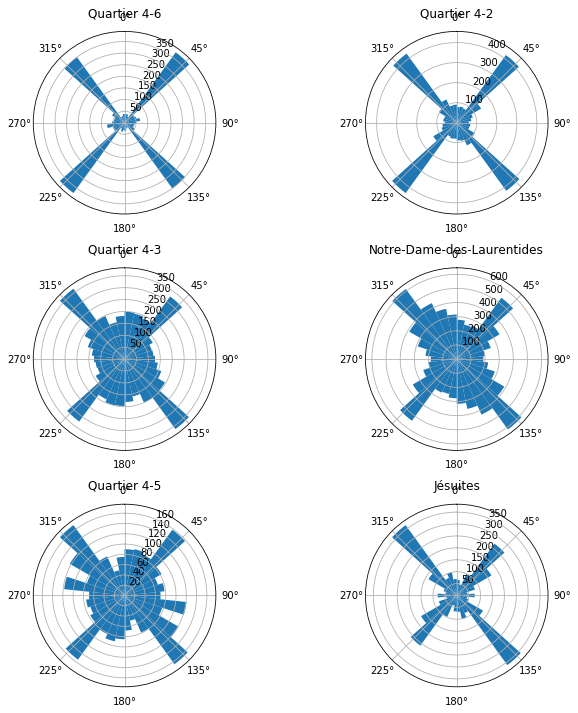

In [120]:
fig=plt.figure(figsize=(10,10))

for k,n in enumerate(listNeigh) :
    numBins=30
    
    graph=listGraphs[n]
    
    #Make sure the bearings have been computed
    if(len(nx.get_edge_attributes(G=graph,name="bearings"))==0):
        print("Computing edge bearings")
        graph=ox.add_edge_bearings(graph)
    
    #Get the bearings into a pandas series
    bearings=pd.Series([data["bearing"] for u,v,k,data in graph.edges(data=True,keys=True)])
    
    #Get the bins
    count, division = np.histogram(bearings,
                                   bins=[ang*360/numBins for ang in range(0,numBins+1)])
    
    bearings=pd.Series([data["bearing"] for u,v,k,data in graph.edges(data=True,keys=True)])
    
    #Get the bins
    count, division = np.histogram(bearings,
                                   bins=[ang*360/numBins for ang in range(0,numBins+1)])

    #Plot the polar graph
    width=2*np.pi/numBins
    
    division = division[0:-1]
    
    ax =plt.subplot(3,2,k+1,projection="polar")
    ax.set_theta_zero_location("N")
    ax.set_theta_direction("clockwise")
    plt.title(f"{n}")
    
    bars=ax.bar(division*np.pi/180-width*0.5,count,width)
    
plt.tight_layout()
fig.savefig( os.path.join(ROOT_DIR, "Figures", "Charlesbourg", "charlesbourgStreetOrientation.png") )